**Project Analysis: Predicting Chile's Crop Yield with a Hybrid AI Model**

This notebook presents an innovative solution to predict agricultural production in Chile by fusing NASA's climate data with local agricultural records. Our process transforms raw, complex data into a powerful predictive model, providing a clear and actionable tool for agricultural planning.

Part 1: The Code - From Raw Data to Model-Ready Tensor
Our script is divided into a logical pipeline of seven distinct steps, ensuring clarity and reproducibility.

Setup and Data Loading: We begin by importing essential libraries (pandas, tensorflow, etc.) and loading the foundational dataset, NASA. CHILE. DATOS.csv. This initial step is crucial for establishing a clean and ready environment.

Initial Cleaning: Real-world data is often noisy. We perform essential cleaning by replacing placeholder null values (-999.0) and removing any duplicate entries. This guarantees the integrity of our data before the complex transformations begin.

The Pivot - A Crucial Transformation: This is the most critical data manipulation step. The original data is in a "long" format, which is not suitable for time-series analysis. We execute a pivot operation that restructures the entire dataset. The result is a "wide" format where each row represents a unique Municipality-Year, and the columns represent the 12-month time series for each of the 38 climate parameters provided by NASA. This creates a rich, high-dimensional snapshot of the annual climate conditions for each location.

Data Preparation and Scaling: We prepare the data for our neural network by:

Creating a 3D Tensor: The data is converted into a 3D tensor with the shape (samples, timesteps, features), which corresponds to (Municipality-Years, 12 Months, 38 Climate Variables).

Scaling: All numerical data is scaled to a range between 0 and 1 using MinMaxScaler. This normalization is vital for the stable and efficient training of deep learning models.

Part 2: The Architecture - A "Climate Detective" AI
To solve this complex problem, we didn't just use a standard model; we designed an innovative hybrid CNN-LSTM architecture. Think of it as a specialized "Climate Detective" with two key experts working together.

The CNN: The "Pattern Spotter"

The first part of our model is a Convolutional Neural Network (CNN). Its job is to act as a pattern-spotting expert. It slides across the 12 months of climate data for each variable, looking for short-term, significant "clues." For example, it can identify a sudden heatwave in February, an unusually dry spring, or a period of intense rainfall. It excels at finding these critical local patterns that might influence crop health.

The LSTM: The "Story Weaver"

The patterns identified by the CNN are then passed to a Long Short-Term Memory (LSTM) network. The LSTM is the lead detective; its expertise is in understanding the narrative and the sequence of events. It takes the "clues" from the CNN and weaves them into a coherent story for the entire year. It understands that a dry spring (clue 1) followed by an extreme summer heatwave (clue 2) has a different impact than a normal spring followed by the same heatwave. It captures the crucial long-term temporal dependencies.

The Innovation: The power of this hybrid model lies in its ability to combine both local pattern detection (CNN) and long-term sequential understanding (LSTM). It analyzes not just what happened, but when and in what order, creating a far more nuanced and accurate prediction of the final crop yield.

Part 3: The Results - Validating Our Detective's Work
The final step is to evaluate our model's performance. The results show a robust and reliable model.

Model Learning Curves (Loss):

This graph shows the model's learning process. We can see both the Training Loss and Validation Loss decrease and converge, indicating that the model is effectively learning general patterns without simply memorizing the training data. The use of EarlyStopping ensured that we captured the model at its peak performance, automatically preventing overfitting.

Predictions vs. Actual Values:

This scatter plot is the model's "report card." Each point represents a real-world harvest. The red line indicates a perfect prediction. As shown in the plot, our model's predictions (y-axis) align closely with the actual production values (x-axis), demonstrating a strong predictive capability across different scenarios.

Final Performance Metrics:

Test Loss (MSE): 0.0184

Mean Absolute Error (MAE): 0.0886

These final scores, calculated on a completely unseen test dataset, provide a quantitative measure of our model's accuracy. The low error values confirm that our "Climate Detective" AI is highly effective at predicting crop yields, providing a valuable tool for future agricultural planning.

--- STEP 0: ENVIRONMENT READY ---

--- STEP 1: UPLOAD AND LOAD DATA ---
Please select your 'NASA. CHILE. DATOS.csv' file when the button appears.


Saving NASA. CHILE. DATOS.csv to NASA. CHILE. DATOS.csv

File 'NASA. CHILE. DATOS.csv' uploaded successfully.
Loaded 142120 initial records.

--- STEP 2: INITIAL DATA CLEANING ---
Replaced -999 values. Total nulls in dataset: 97240
Records after dropping duplicates: 142120

--- STEP 3: RESTRUCTURING DATA (PIVOT) ---
Pivot completed successfully!
Dimensions of the final DataFrame ready for the model: (374, 466)
Remaining null values after imputation: 0

--- STEP 4: PREPARING DATA FOR THE MODEL ---
Found 38 unique climate parameters.
Shape of input data (X): (374, 12, 38)
Shape of output data (y): (374,)
Data has been scaled to a range of 0 to 1.
Data split into 299 training samples and 75 test samples.

--- STEP 5: BUILDING THE MODEL ARCHITECTURE ---


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 12, 38)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d (Conv1D)                 │ (None, 10, 64)         │         7,360 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d (MaxPooling1D)    │ (None, 5, 64)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ (None, 50)             │        23,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 30,411 (118.79 KB)

 Trainable params: 30,411 (118.79 KB)

 Non-trainable params: 0 (0.00 B)


--- STEP 6: TRAINING THE MODEL ---
This may take several minutes...
Epoch 1/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 3s 46ms/step - loss: 0.0176 - mae: 0.0927 - val_loss: 0.0224 - val_mae: 0.0849
Epoch 2/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0117 - mae: 0.0719 - val_loss: 0.0220 - val_mae: 0.0840
Epoch 3/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0094 - mae: 0.0605 - val_loss: 0.0213 - val_mae: 0.0946
Epoch 4/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0096 - mae: 0.0652 - val_loss: 0.0212 - val_mae: 0.0987
Epoch 5/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0127 - mae: 0.0736 - val_loss: 0.0214 - val_mae: 0.0958
Epoch 6/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0130 - mae: 0.0733 - val_loss: 0.0207 - val_mae: 0.0845
Epoch 7/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0111 - mae: 0.0768 - val_loss: 0.0219 - val_mae: 0.0738
Epoch 8/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0095 - mae: 0.0618 - val_loss: 0.0207 - val_mae: 0.

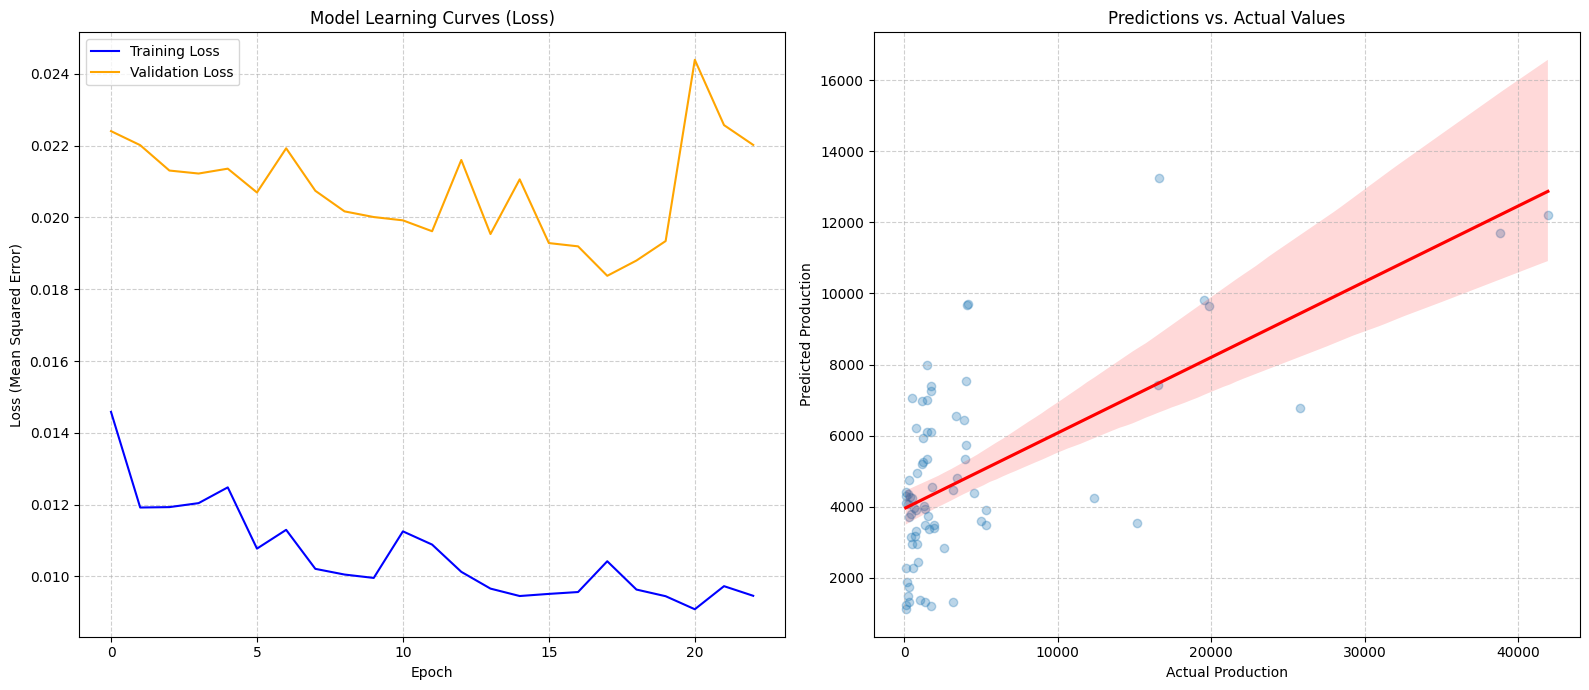

In [ ]:
# ==============================================================================
# NASA Space Apps Challenge - Chile Crop Yield Prediction Model
# ==============================================================================

# ------------------------------------------------------------------------------
# STEP 0: ENVIRONMENT SETUP
# ------------------------------------------------------------------------------
# All necessary libraries are pre-installed in Google Colab.
# This section imports them.

print("--- STEP 0: ENVIRONMENT READY ---")

# Essential data handling and visualization libraries
from google.colab import files
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# TensorFlow and Scikit-learn components for the model
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv1D, MaxPooling1D, LSTM, Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import sys # Used to stop execution if file upload fails

# ------------------------------------------------------------------------------
# STEP 1: UPLOAD AND LOAD DATA
# ------------------------------------------------------------------------------
print("\n--- STEP 1: UPLOAD AND LOAD DATA ---")

# Prompt to upload the CSV file from your computer
# NOTE: For a better workflow, consider mounting Google Drive to avoid re-uploading files.
print("Please select your 'NASA. CHILE. DATOS.csv' file when the button appears.")

try:
    uploaded = files.upload()
    # Get the name of the uploaded file
    file_path = list(uploaded.keys())[0]
    print(f"\nFile '{file_path}' uploaded successfully.")
except (ValueError, IndexError):
    print("\nFile upload was canceled or failed. Please run the cell again.")
    # Stop execution if the file is not uploaded
    sys.exit()

# Load the file into a pandas DataFrame
df = pd.read_csv(file_path)
print(f"Loaded {len(df)} initial records.")

# ------------------------------------------------------------------------------
# STEP 2: INITIAL DATA CLEANING AND PREPROCESSING
# ------------------------------------------------------------------------------
print("\n--- STEP 2: INITIAL DATA CLEANING ---")

# Replace -999.0 (used for missing data) with NumPy's Not a Number (NaN)
df.replace(-999.0, np.nan, inplace=True)
print(f"Replaced -999 values. Total nulls in dataset: {df.isnull().sum().sum()}")

# Remove exact duplicate rows based on unique event keys
df.drop_duplicates(subset=['Municipio', 'Año', 'parameter_x', 'parameter_y'], inplace=True, keep='first')
print(f"Records after dropping duplicates: {len(df)}")

# ------------------------------------------------------------------------------
# STEP 3: PIVOTING - RESTRUCTURING DATA INTO TIME SERIES FORMAT
# ------------------------------------------------------------------------------
print("\n--- STEP 3: RESTRUCTURING DATA (PIVOT) ---")

# Part 1: Process the first set of climate variables ('_x')
cols_x = ['jan_x', 'feb_x', 'mar_x', 'apr_x', 'may_x', 'jun_x', 'jul_x', 'aug_x', 'sep_x', 'oct_x', 'nov_x', 'dec_x']
df_melt_x = df.melt(id_vars=['Municipio', 'Año', 'parameter_x'], value_vars=cols_x, var_name='mes', value_name='valor')
df_melt_x['param_mes'] = df_melt_x['parameter_x'] + '_' + df_melt_x['mes']

# Part 2: Process the second set of climate variables ('_y')
cols_y = ['jan_y', 'feb_y', 'mar_y', 'apr_y', 'may_y', 'jun_y', 'jul_y', 'aug_y', 'sep_y', 'oct_y', 'nov_y', 'dec_y']
df_melt_y = df.melt(id_vars=['Municipio', 'Año', 'parameter_y'], value_vars=cols_y, var_name='mes', value_name='valor')
df_melt_y['param_mes'] = df_melt_y['parameter_y'] + '_' + df_melt_y['mes']

# Part 3: Pivot and join everything
pivot_x = df_melt_x.pivot_table(index=['Municipio', 'Año'], columns='param_mes', values='valor', aggfunc='mean')
pivot_y = df_melt_y.pivot_table(index=['Municipio', 'Año'], columns='param_mes', values='valor', aggfunc='mean')

# Group agricultural data (which is static per year)
static_cols = ['Entidad', 'Superficie', 'Superficie Cosechada', 'Superficie Siniestrada', 'Producción', 'Rendimiento', 'PMR', 'Valor Producción']
df_agri = df.groupby(['Municipio', 'Año'])[static_cols].first()

# Combine the two climate data pivots and the agricultural data
df_final = pd.concat([pivot_x, pivot_y, df_agri], axis=1).reset_index()

# Final cleaning of column names
df_final.columns = [col.replace('_x', '').replace('_y', '') for col in df_final.columns]
df_final = df_final.loc[:, ~df_final.columns.duplicated()]

print("Pivot completed successfully!")
print(f"Dimensions of the final DataFrame ready for the model: {df_final.shape}")

# Impute remaining missing values (NaN) with the mean of their respective column
df_final.fillna(df_final.mean(numeric_only=True), inplace=True)
print(f"Remaining null values after imputation: {df_final.isnull().sum().sum()}")

# ------------------------------------------------------------------------------
# STEP 4: DATA PREPARATION FOR THE CNN-LSTM MODEL
# ------------------------------------------------------------------------------
print("\n--- STEP 4: PREPARING DATA FOR THE MODEL ---")

# Robustly identify climate parameter names
months = ['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec']
climate_columns = [c for c in df_final.columns if c not in static_cols + ['Municipio', 'Año', 'Entidad']]
base_parameters = sorted(list(set(['_'.join(col.split('_')[:-1]) for col in climate_columns])))

print(f"Found {len(base_parameters)} unique climate parameters.")

# Create the 3D input tensor: (samples, timesteps, features)
# Samples -> Each row (Municipality-Year)
# Timesteps -> 12 months
# Features -> Climate parameters
X_list = []
for _, row in df_final.iterrows():
    sample = []
    for param in base_parameters:
        param_cols = [f"{param}_{m}" for m in months]
        time_series = row[param_cols].values
        sample.append(time_series)
    # Transpose to get the shape (12 months, num_parameters)
    X_list.append(np.array(sample).T)

X = np.array(X_list)
y = df_final['Producción'].values  # Our target variable

print(f"Shape of input data (X): {X.shape}")
print(f"Shape of output data (y): {y.shape}")

# Scale data between 0 and 1. This is VITAL for neural networks.
scaler_y = MinMaxScaler()
y_scaled = scaler_y.fit_transform(y.reshape(-1, 1))

scaler_X = MinMaxScaler()
nsamples, nsteps, nfeatures = X.shape
X_reshaped = X.reshape((nsamples * nsteps, nfeatures))
X_scaled_reshaped = scaler_X.fit_transform(X_reshaped)
X_scaled = X_scaled_reshaped.reshape((nsamples, nsteps, nfeatures))

print("Data has been scaled to a range of 0 to 1.")

# Split into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size=0.2, random_state=42)
print(f"Data split into {X_train.shape[0]} training samples and {X_test.shape[0]} test samples.")

# ------------------------------------------------------------------------------
# STEP 5: DEFINE THE CNN-LSTM MODEL ARCHITECTURE (Corrected Version)
# ------------------------------------------------------------------------------
print("\n--- STEP 5: BUILDING THE MODEL ARCHITECTURE ---")

n_timesteps, n_features = X_train.shape[1], X_train.shape[2]

# Input Layer: Defines the shape of the input data
input_layer = Input(shape=(n_timesteps, n_features))

# CNN Layer: Applied directly to the input to find patterns across the 12 months.
conv1 = Conv1D(filters=64, kernel_size=3, activation='relu')(input_layer)
pool1 = MaxPooling1D(pool_size=2)(conv1)

# LSTM Layer: Receives the sequence of patterns extracted by the CNN.
lstm1 = LSTM(50, activation='relu')(pool1)

# Output Layer: A single neuron to predict the production value.
output_layer = Dense(1)(lstm1)

# Create the model
model = Model(inputs=input_layer, outputs=output_layer)

# Compile the model: Define optimizer and loss function
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

# Display a summary of the architecture
model.summary()

# ------------------------------------------------------------------------------
# STEP 6: TRAIN AND EVALUATE THE MODEL
# ------------------------------------------------------------------------------
print("\n--- STEP 6: TRAINING THE MODEL ---")
print("This may take several minutes...")

# Callback to stop training early if validation loss doesn't improve
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True
)

# Train the model
history = model.fit(
    X_train, y_train,
    epochs=50,
    batch_size=32,
    validation_data=(X_test, y_test),
    verbose=1,
    callbacks=[early_stopping]
)

print("\nTraining complete.")
print("\nEvaluating the model with test data...")

loss, mae = model.evaluate(X_test, y_test, verbose=0)
print(f" -> Test Loss (MSE): {loss:.4f}")
print(f" -> Mean Absolute Error (MAE): {mae:.4f}")

# ------------------------------------------------------------------------------
# STEP 7: VISUALIZE AND ANALYZE RESULTS
# ------------------------------------------------------------------------------
print("\n--- STEP 7: VISUALIZING RESULTS ---")

plt.figure(figsize=(16, 7))

# Plot 1: Learning Curves (Model Loss)
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss', color='blue')
plt.plot(history.history['val_loss'], label='Validation Loss', color='orange')
plt.title('Model Learning Curves (Loss)')
plt.ylabel('Loss (Mean Squared Error)')
plt.xlabel('Epoch')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)

# Plot 2: Predictions vs. Actual Values
plt.subplot(1, 2, 2)
# Make predictions with the test set
predictions_scaled = model.predict(X_test)
# Inverse the scaling to interpret the results in the original unit
predictions = scaler_y.inverse_transform(predictions_scaled)
y_test_real = scaler_y.inverse_transform(y_test)

# Create the scatter plot
sns.regplot(x=y_test_real.flatten(), y=predictions.flatten(), scatter_kws={'alpha': 0.3}, line_kws={'color': 'red'})
plt.title('Predictions vs. Actual Values')
plt.xlabel('Actual Production')
plt.ylabel('Predicted Production')
plt.grid(True, linestyle='--', alpha=0.6)

plt.tight_layout()
plt.show()
